# Testing github - colab integration 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Prepare dataset

In [ ]:
train_sessions = pd.read_csv(
    'train_sessions.csv',
    parse_dates=['date'], 
    infer_datetime_format=True
    )

In [ ]:
test_sessions = pd.read_csv(
    'test_final_sessions.csv',
    parse_dates=['date'], 
    infer_datetime_format=True
    )

In [ ]:
test_sessions_lb = pd.read_csv(
    'test_leaderboard_sessions.csv',
    parse_dates=['date'], 
    infer_datetime_format=True
    )

In [ ]:
test_sessions=pd.concat([test_sessions,test_sessions_lb])

In [ ]:
session_list = train_sessions[['session_id', 'item_id']].groupby(['session_id']).agg(tuple).applymap(list).reset_index()
session_date = train_sessions[['session_id', 'date']].groupby(['session_id']).agg(['min','max',"mean"]).reset_index()

session_list.rename({"item_id":"session"})

,session_id,item_id
0,3,"[9769, 9769]"
1,13,[12783]
2,18,"[14116, 6166, 6924]"
3,19,"[4546, 8092, 17752, 14975, 9083, 9079, 7096, 8..."
4,24,"[6381, 10784, 6381, 23669, 5215, 2842, 10162, ..."
...,...,...
999995,4439986,"[2464, 3424, 2381, 4167, 4902, 2204]"
999996,4439990,"[5648, 15997, 1425, 3037, 5523, 6925, 13664, 6..."
999997,4439994,[4493]
999998,4439999,"[11487, 9163, 5607, 6006, 7907, 1539, 12884]"


In [ ]:
session_date.columns = session_date.columns.droplevel()
session_date.columns = ["session_id","min","max","mean"]
#remove min from mean to get average time distance between clicks


In [ ]:
session=session_date.merge(session_list,how="left",on="session_id")

In [ ]:
session["length_all"]=session["item_id"].apply(lambda x: len(x))
session["length_unique"]=session["item_id"].apply(lambda x: len(set(x)))
session["repeated_count"] = session["length_all"] -session["length_unique"]
session["mean"] = (session_date["max"]-session_date["min"])/session["length_all"]
session["month"] =session["min"].dt.month
session["year"] =session["min"].dt.year
session["day_of_week"] = session["min"].dt.dayofweek
session["hour_start"] = session["min"].dt.hour
session["hour_end"]  = session["max"].dt.hour
session["length"] = session["max"]-session["min"]

In [ ]:
session["mean_minutes"]=(session["mean"].dt.total_seconds()/60).astype(int)
session["length_hours"]=(session["length"].dt.total_seconds()/3600).astype(int)
session["length_minutes"]=(session["length"].dt.total_seconds()/60).astype(int)


In [ ]:
session.head()

,session_id,min,max,mean,item_id,length_all,length_unique,repeated_count,month,year,day_of_week,hour_start,hour_end,length,mean_minutes,length_hours,length_minutes
0,3,2020-12-18 21:19:48.093,2020-12-18 21:25:00.373,0 days 00:02:36.140000,"[9769, 9769]",2,1,1,12,2020,4,21,21,0 days 00:05:12.280000,2,0,5
1,13,2020-03-13 19:35:27.136,2020-03-13 19:35:27.136,0 days 00:00:00,[12783],1,1,0,3,2020,4,19,19,0 days 00:00:00,0,0,0
2,18,2020-08-26 19:15:47.232,2020-08-26 19:18:30.833,0 days 00:00:54.533666666,"[14116, 6166, 6924]",3,3,0,8,2020,2,19,19,0 days 00:02:43.601000,0,0,2
3,19,2020-11-02 16:30:36.378,2020-11-02 16:48:39.343,0 days 00:01:03.703823529,"[4546, 8092, 17752, 14975, 9083, 9079, 7096, 8...",17,17,0,11,2020,0,16,16,0 days 00:18:02.965000,1,0,18
4,24,2020-02-26 17:22:48.903,2020-02-26 18:24:32.770,0 days 00:06:51.540777777,"[6381, 10784, 6381, 23669, 5215, 2842, 10162, ...",9,8,1,2,2020,2,17,18,0 days 01:01:43.867000,6,1,61


# Important Datetimes

In [ ]:
session["min"].min()

Timestamp('2020-01-01 00:00:01.359000')

In [ ]:
session["min"].max()

Timestamp('2021-05-31 23:41:09.230000')

Split validation as last month ?  get sessions up to 2021-04-31 ? 

# Datetime distributions

## Hour of day Distribution

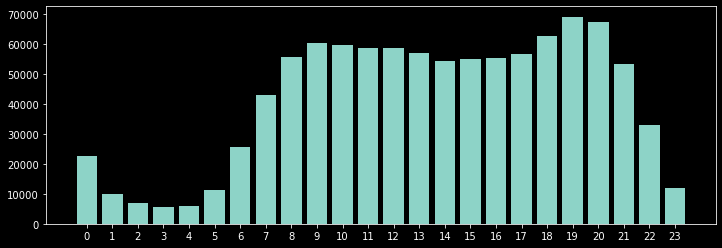

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
temp=session.groupby(session["hour_start"]).count()[["session_id"]]

plt.bar(temp.index,temp["session_id"])
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

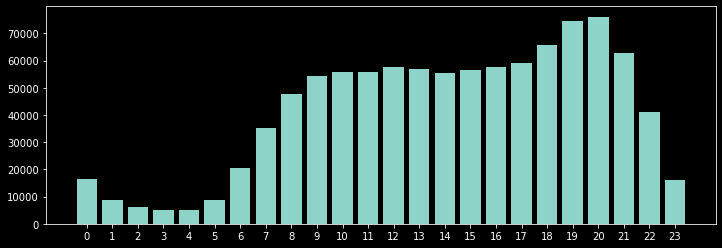

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
temp=session.groupby(session["hour_end"]).count()[["session_id"]]

plt.bar(temp.index,temp["session_id"])
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

## Weekday distribution

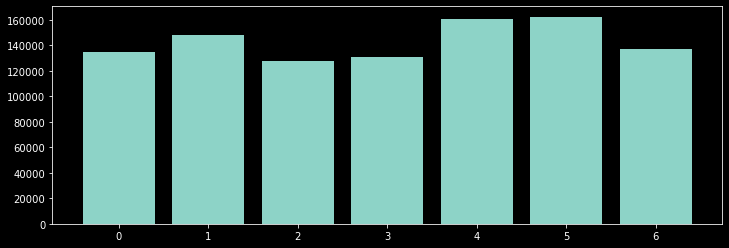

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
temp=session.groupby(session["day_of_week"]).count()[["session_id"]]

plt.bar(temp.index,temp["session_id"])
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

## Month Distribution


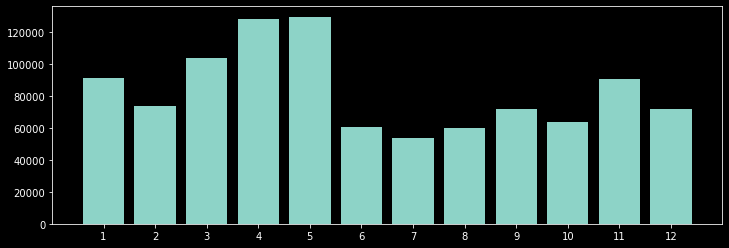

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
temp=session.groupby(session["month"]).count()[["session_id"]]

plt.bar(temp.index,temp["session_id"])
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

## Distinguishing between two years

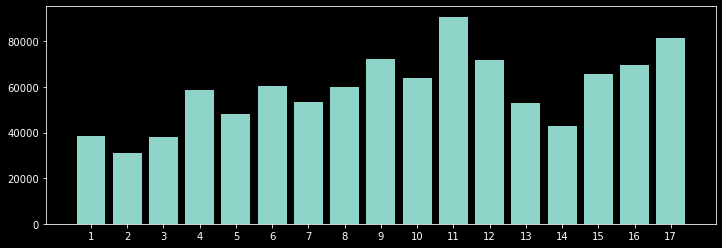

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
temp=session.groupby([session["month"],session["year"]]).count()[["session_id"]].reset_index(level=[0,1])
temp["month_year"]=temp["month"]+(temp["year"]-2020)*12
plt.bar(temp["month_year"],temp["session_id"])
plt.xticks(np.arange(min(temp["month_year"]), max(temp["month_year"])+1, 1.0))
plt.show()

## Average click distance

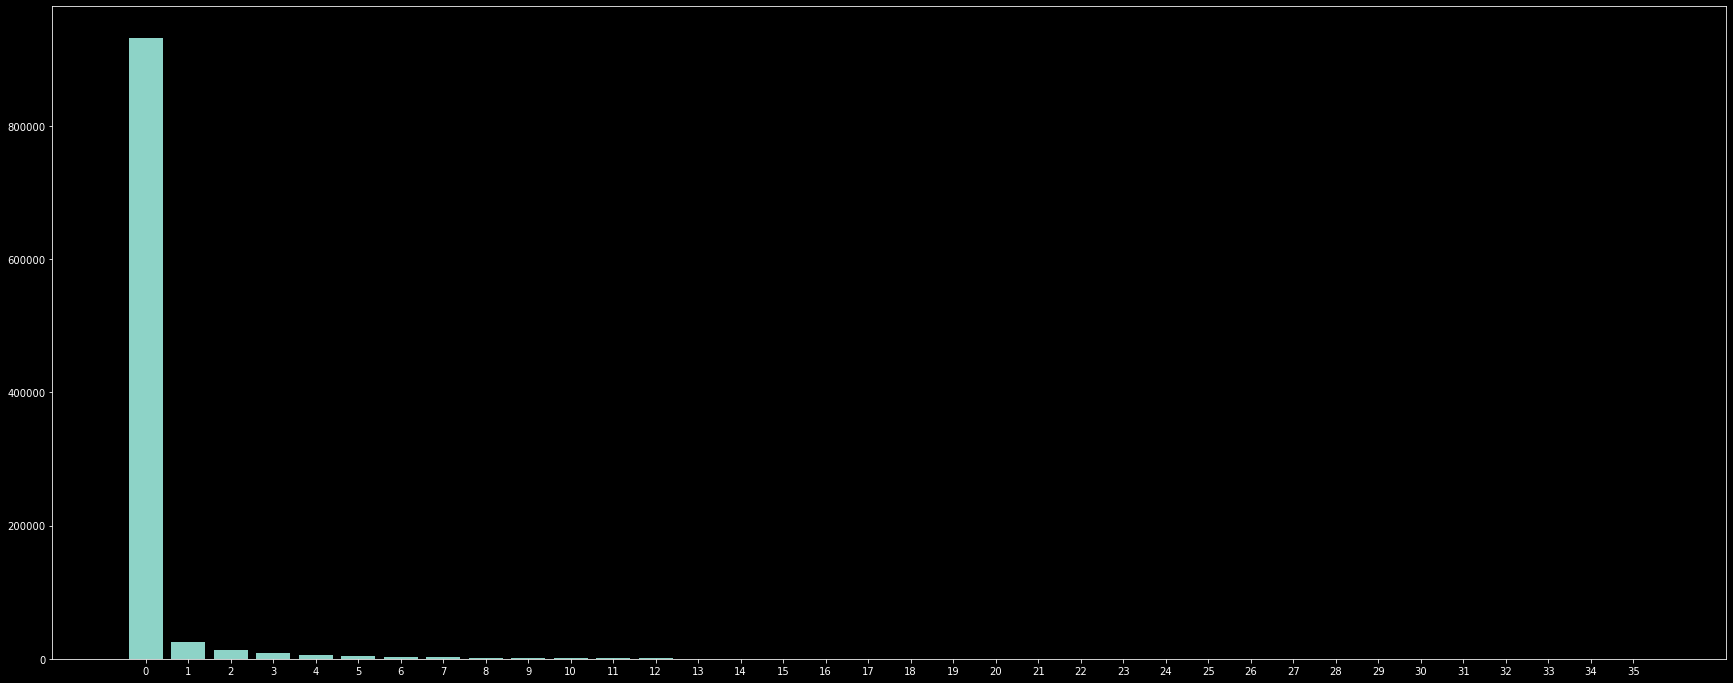

In [ ]:
# Magari vedere con intervalli più piccoli (invece di 20 minuti, fare 10).
# Questo può generare una feature utile per distinguere sessioni "interattive" (utente costantemente al PC)
# Da quelle con l'utente che si è scordato il PC acceso
fig, axs = plt.subplots(figsize=(30, 12))
temp=session.groupby((session["mean_minutes"]/20).astype(int)).count()[["session_id"]]

plt.bar(temp.index,(temp["session_id"]))
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

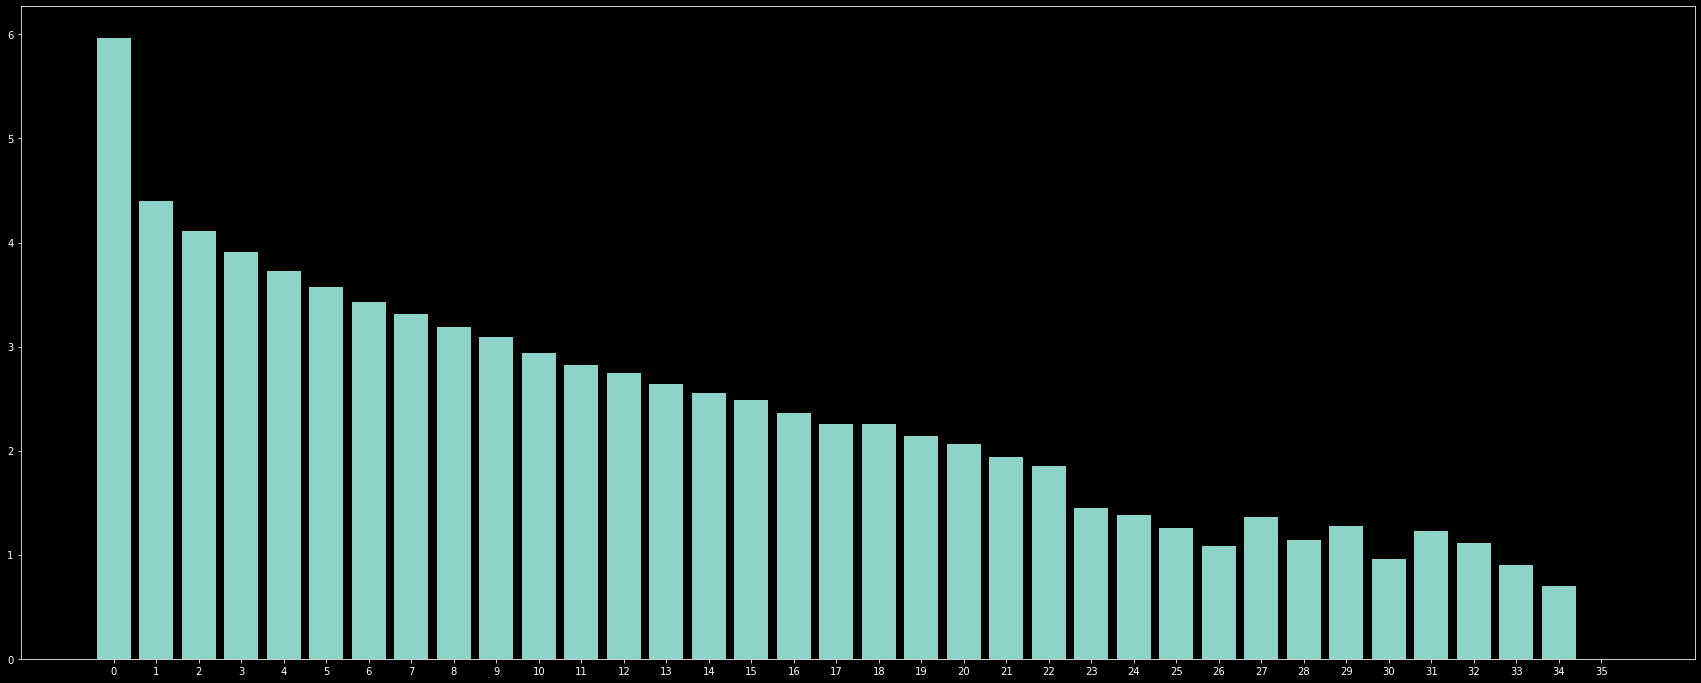

In [ ]:
fig, axs = plt.subplots(figsize=(30, 12))
temp=session.groupby((session["mean_minutes"]/20).astype(int)).count()[["session_id"]]

plt.bar(temp.index,np.log10(temp["session_id"]))
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

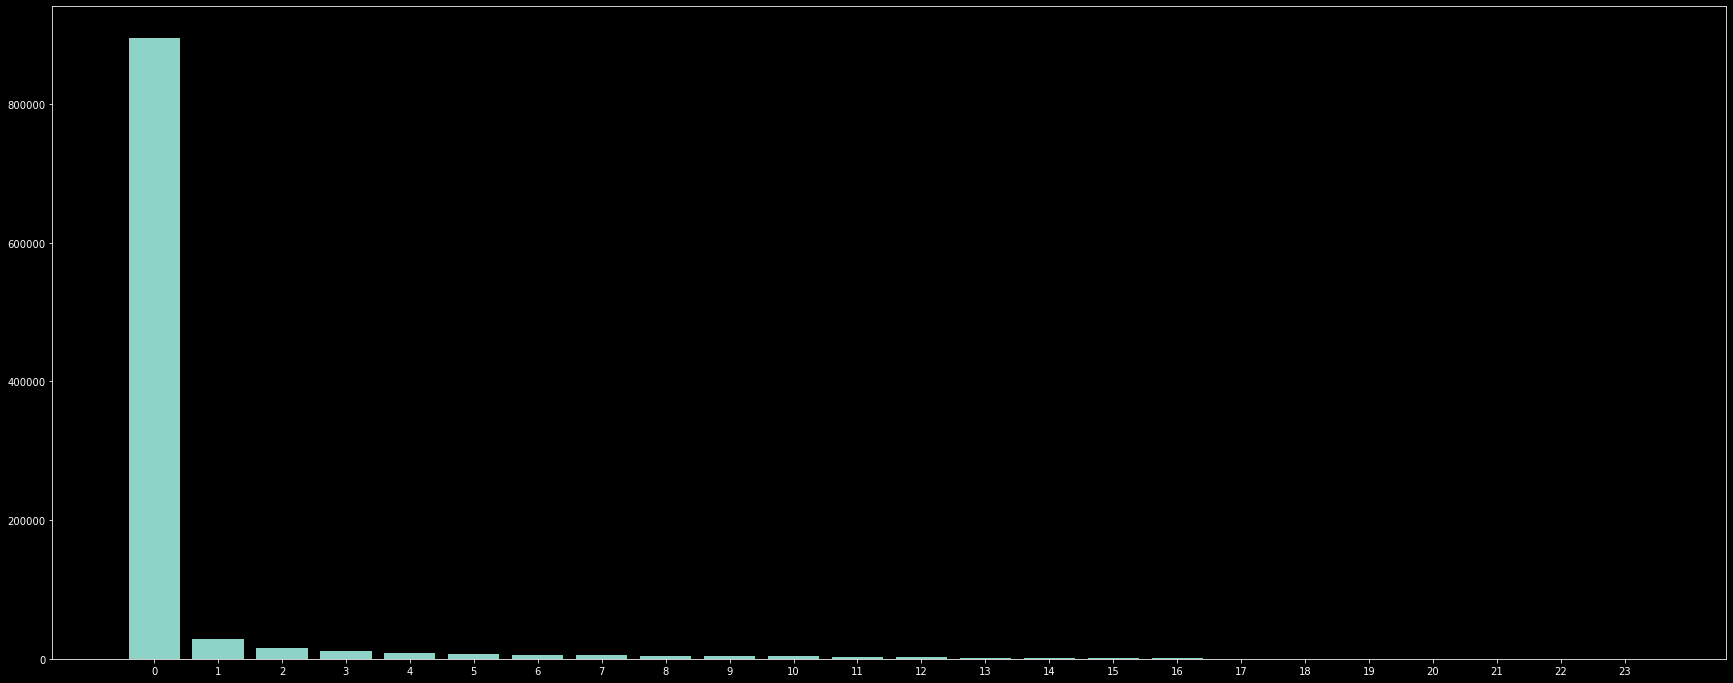

In [ ]:
fig, axs = plt.subplots(figsize=(30, 12))
temp=session.groupby((session["length_hours"]).astype(int)).count()[["session_id"]]

plt.bar(temp.index,(temp["session_id"]))
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

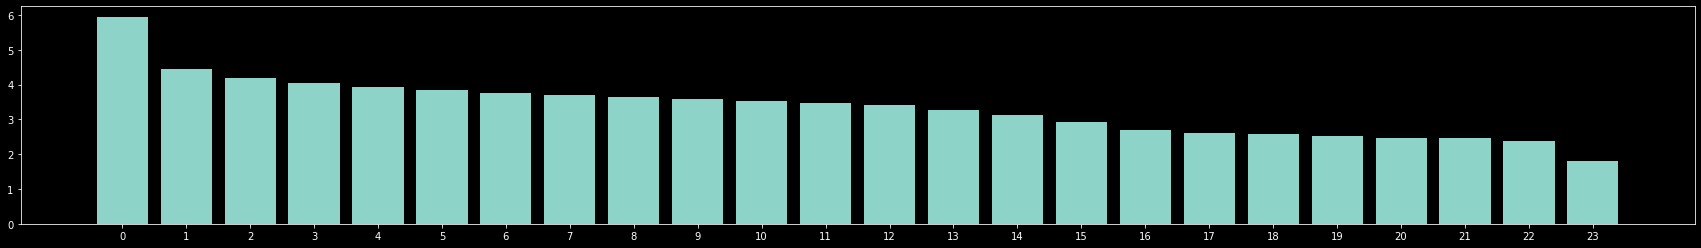

In [ ]:
fig, axs = plt.subplots(figsize=(30, 4))
temp=session.groupby((session["length_hours"]).astype(int)).count()[["session_id"]]

plt.bar(temp.index,np.log10(temp["session_id"]))
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

# Distribution of lengths

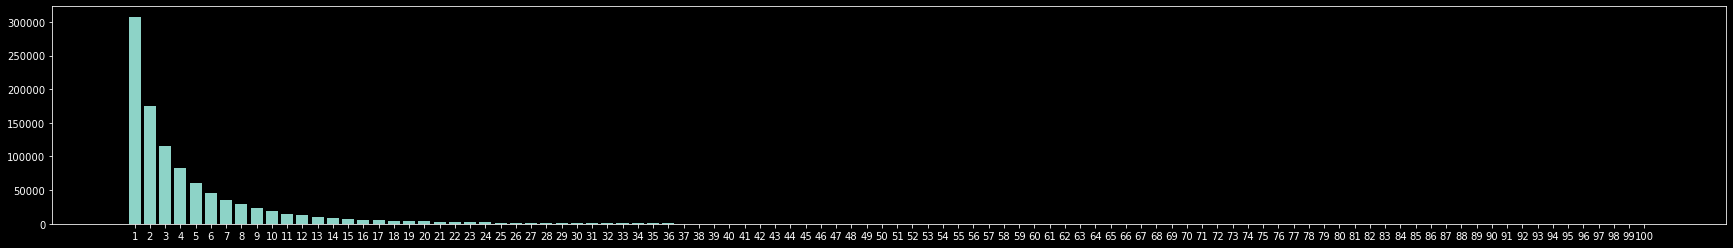

In [ ]:
# Interessante risultato, la lunghezza di molte sessini è un solo item
# Potremmo splittare in due modelli, uno su sequenze vere e proprie, l'altro su singoli item
fig, axs = plt.subplots(figsize=(30, 4))
temp=session.groupby(session["length_all"]).count()[["session_id"]]

plt.bar(temp.index,temp["session_id"])
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

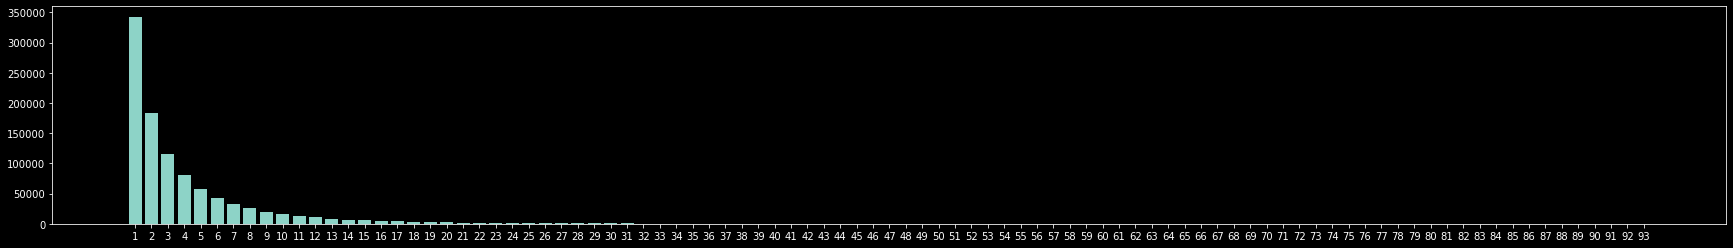

In [ ]:
fig, axs = plt.subplots(figsize=(30, 4))
temp=session.groupby(session["length_unique"]).count()[["session_id"]]

plt.bar(temp.index,temp["session_id"])
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

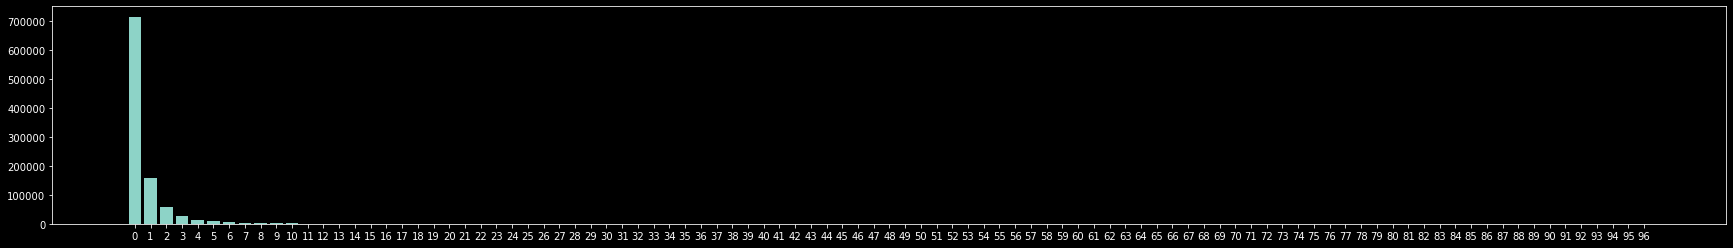

In [ ]:
fig, axs = plt.subplots(figsize=(30, 4))
temp=session.groupby(session["repeated_count"]).count()[["session_id"]]

plt.bar(temp.index,temp["session_id"])
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

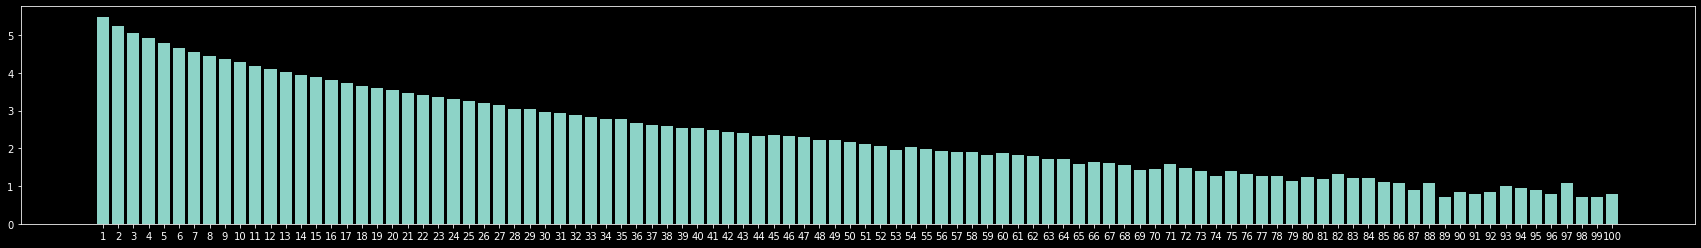

In [ ]:
fig, axs = plt.subplots(figsize=(30, 4))
temp=session.groupby(session["length_all"]).count()[["session_id"]]

plt.bar(temp.index,np.log10(temp["session_id"]))
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

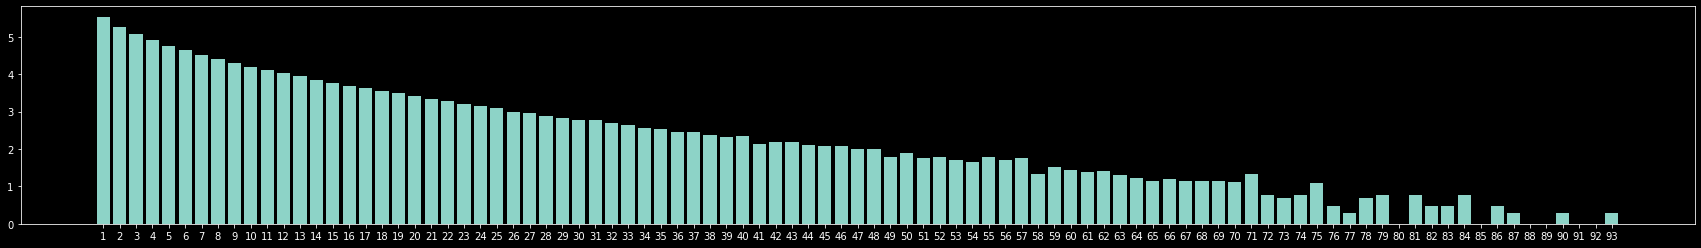

In [ ]:
fig, axs = plt.subplots(figsize=(30, 4))
temp=session.groupby(session["length_unique"]).count()[["session_id"]]

plt.bar(temp.index,np.log10(temp["session_id"]))
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

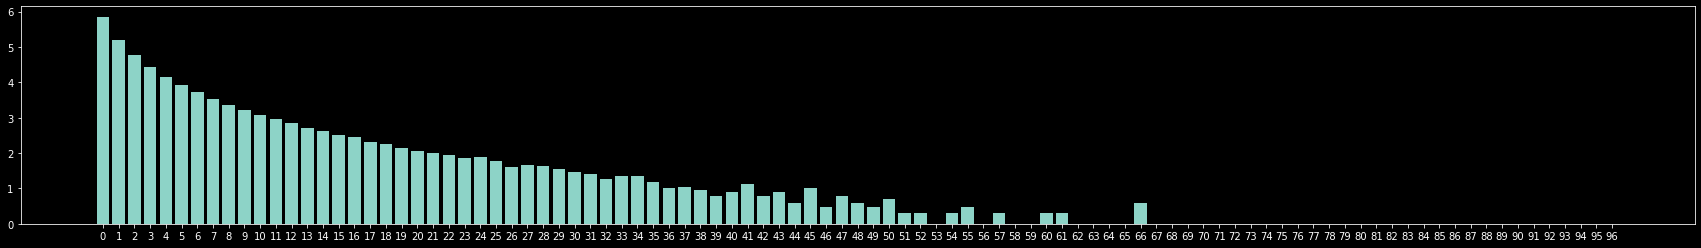

In [ ]:
fig, axs = plt.subplots(figsize=(30, 4))
temp=session.groupby(session["repeated_count"]).count()[["session_id"]]

plt.bar(temp.index,np.log10(temp["session_id"]))
plt.xticks(np.arange(min(temp.index), max(temp.index)+1, 1.0))
plt.show()

# Popularity in session

## Frequency of item_ids

In [ ]:
train_sessions["value"]=1
test_sessions["value"]=1

In [ ]:
items=train_sessions.groupby("item_id")["value"].count().reset_index()

In [ ]:
items=items.sort_values(by="value",ascending=False)

In [ ]:
items["log_value"]=np.log(items["value"])

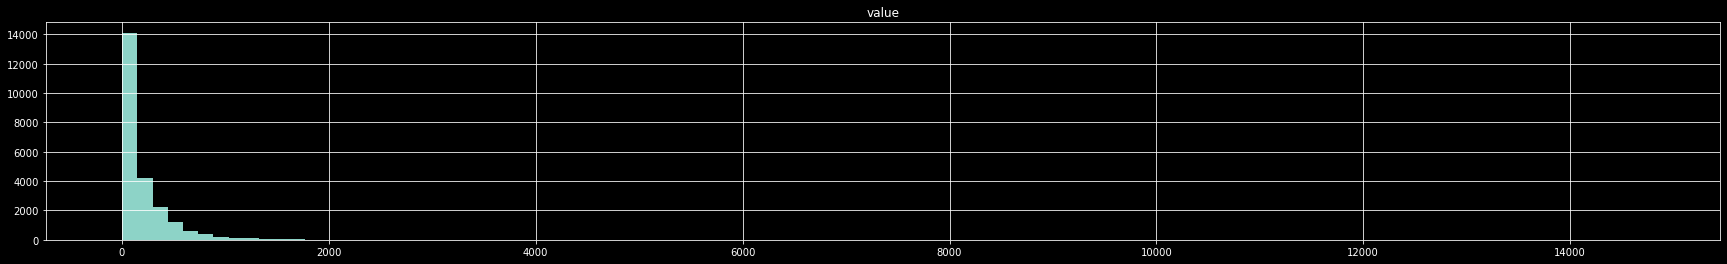

In [ ]:
hist=items.hist(column="value",bins=100,figsize=(30, 4))

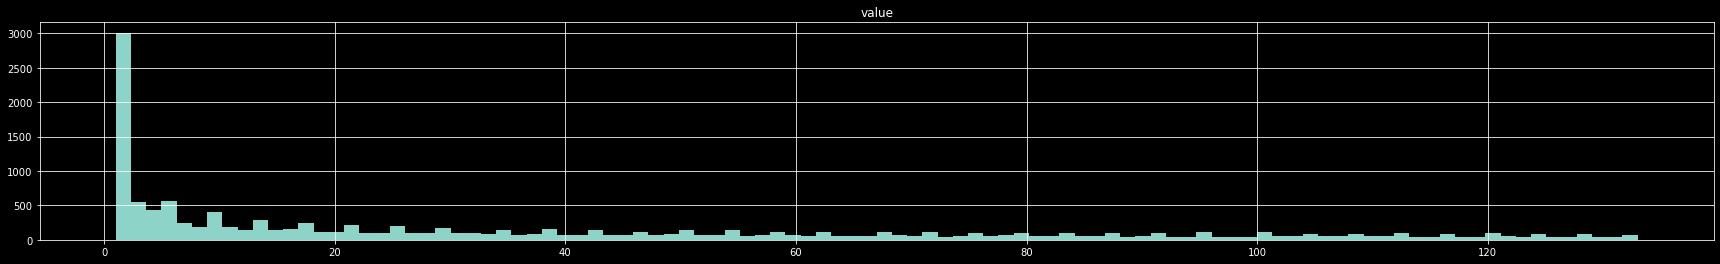

In [ ]:
hist=items[10000:].hist(column="value",bins=100,figsize=(30, 4))

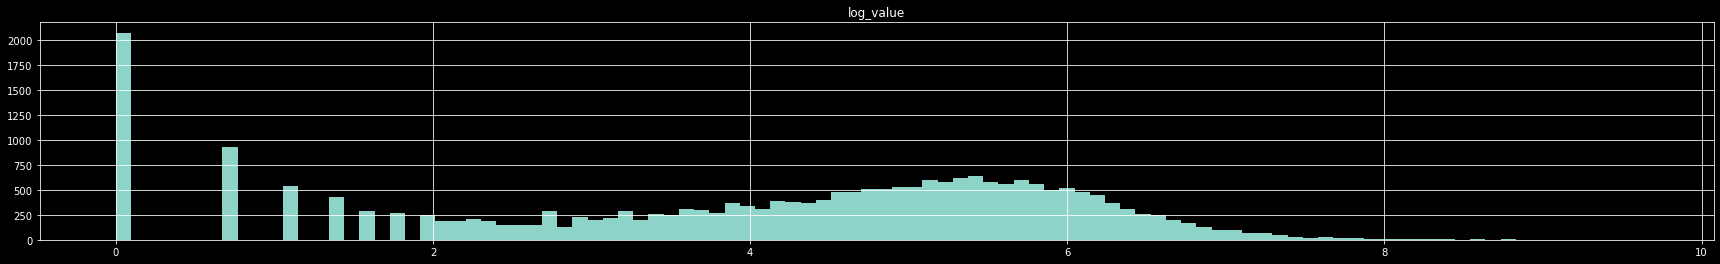

In [ ]:
hist=items.hist(column="log_value",bins=100,figsize=(30, 4))

## TopPop Analisis

In [ ]:
top_pop_general=items["item_id"][:100].values.tolist()

In [ ]:
for item in top_pop_general:
    print(str(item)+",",end=" ")
print()
1468, 4741, 6135, 323, 3526, 3037, 9262, 1449, 3229, 2115, 5960, 16491, 6925, 1659, 3676, 3833, 1393, 3531, 4714, 1227, 3060, 3746, 4878, 786, 4411, 3306, 200, 4810, 2180, 3586, 540, 1609, 554, 4870, 190, 2734,
2466, 2549, 4796, 4935, 3844, 11075, 2954, 917, 1869, 3886, 3400, 772, 6006, 2674, 4026, 6345, 4158, 8828, 2577, 17081, 4645, 11658, 407, 3362, 1584, 270, 4213, 4503, 15531, 3867, 11761, 
2530, 3004, 7597, 14563, 10738, 3656, 18733, 6785, 4631, 4036, 2320, 2780, 10479, 7749, 1458, 3318, 2302, 4007, 5215, 3333, 9661, 2546, 2842, 2638, 14744, 2233, 3155, 13059, 2785, 421, 3550, 4691, 1148

1468, 4741, 6135, 323, 3526, 1449, 9262, 3037, 2115, 3229, 16491, 5960, 6925, 3676, 1659, 3833, 3531, 1227, 4714, 1393, 3060, 4878, 3746, 554, 3306, 4411, 786, 200, 3586, 4810, 2180, 540, 1609, 4870, 190, 772, 3400, 2734, 2549, 2466, 6006, 11075, 4796, 3886, 3844, 4935, 4026, 1869, 917, 2954, 6345, 2674, 4645, 8828, 2577, 270, 3004, 407, 4158, 1458, 17081, 4007, 11658, 1584, 3362, 15531, 4213, 2530, 2694, 3656, 11761, 10738, 3867, 4503, 18733, 4631, 7597, 4846, 10479, 2320, 2302, 3550, 3318, 9661, 2638, 2842, 4036, 2780, 7749, 3333, 6785, 2546, 2233, 3155, 14563, 13059, 5215, 2785, 232, 4989, 


In [ ]:
train_sessions["month"] =train_sessions["date"].dt.month
train_sessions["year"] =train_sessions["date"].dt.year

In [ ]:
monthly_ds=train_sessions.groupby(["month","year","item_id"])["value"].count().reset_index()

In [ ]:
monthly_ds

,month,year,item_id,value
0,1,2020,30,25
1,1,2020,34,1
2,1,2020,62,3
3,1,2020,108,6
4,1,2020,186,62
...,...,...,...,...
122535,12,2020,23591,1
122536,12,2020,23595,1
122537,12,2020,23635,5
122538,12,2020,23655,1


In [ ]:
top_pops={}
top_pops["general"]=top_pop_general

In [ ]:
for year in range(2):
    year=year+2020
    for month in range(12):
        month+=1
        if year==2021 and month>5:
            break
        
        ds=monthly_ds[monthly_ds["month"]==month]
        ds=ds[ds["year"]==year]
        ds=ds.sort_values(by="value",ascending=False)
        top_pops[f"{month}/{year}"]=ds["item_id"][:100].values.tolist()

In [ ]:
seen=[]
heatmap=np.zeros((len(top_pops.keys()),len(top_pops.keys())))
for x,i in enumerate(top_pops.keys()):
    for y,j in enumerate(top_pops.keys()):
        seen.append(i)
        if j not in seen:
            count=0
            for item in top_pops[i]:
                if item in top_pops[j]:
                    count+=1
            #print(f"items_in_common between {i} and {j}: {count}")
            heatmap[x,y]=count
            heatmap[y,x]=count

In [ ]:
top_pops.keys()

dict_keys(['general', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021'])

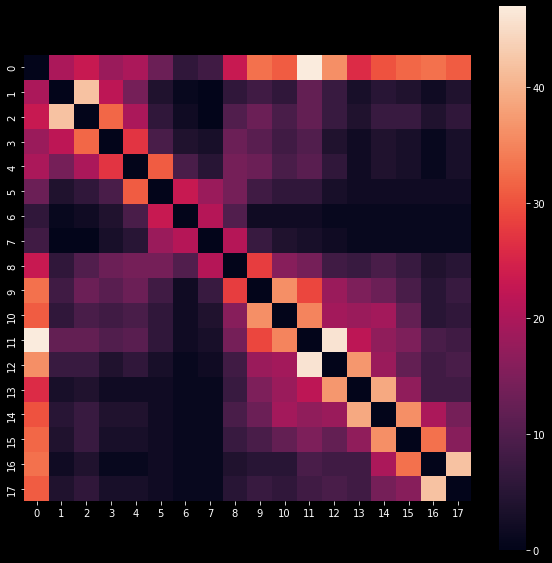

In [ ]:
#0 is overall top_popular_list
#other numbers are the index of the month starting from january 2020 up to may 2021
#We can see that general top pop is close to november 2020 -> this can be due to the fact that is the month with most sessions
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(heatmap, square=True)

## Added test set to heatmap

In [ ]:
items_test=test_sessions.groupby("item_id")["value"].count().reset_index()
items_test=items_test.sort_values(by="value",ascending=False)
top_pop_test=items_test["item_id"][:100].values.tolist()

In [ ]:
heatmap_test=np.zeros((len(top_pops.keys())+1,len(top_pops.keys())+1))

In [ ]:
heatmap_test[:-1,:-1]=heatmap

In [ ]:
for x,i in enumerate(top_pops.keys()):
    count=0
    for item in top_pops[i]:
        if item in top_pop_test:
            count+=1
    heatmap_test[-1,x] = count
    heatmap_test[x,-1] = count

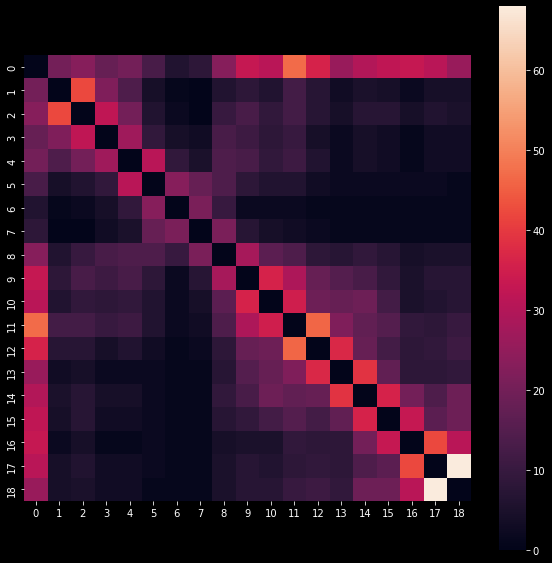

In [ ]:
#last row/column are test set interaction top_pop
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(heatmap_test, square=True)

# Popularity in session removing duplicates from sessions

## Frequency of item_ids

In [ ]:
train_sessions["value"]=1
test_sessions["value"]=1
train_sessions_no_duplicates=train_sessions[["item_id","session_id","value"]]
test_sessions_no_duplicates=test_sessions[["item_id","session_id","value"]]
train_sessions_no_duplicates.drop_duplicates(inplace=True)
test_sessions_no_duplicates.drop_duplicates(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
items=train_sessions_no_duplicates.groupby("item_id")["value"].count().reset_index()

In [ ]:
items=items.sort_values(by="value",ascending=False)

In [ ]:
items["log_value"]=np.log(items["value"])

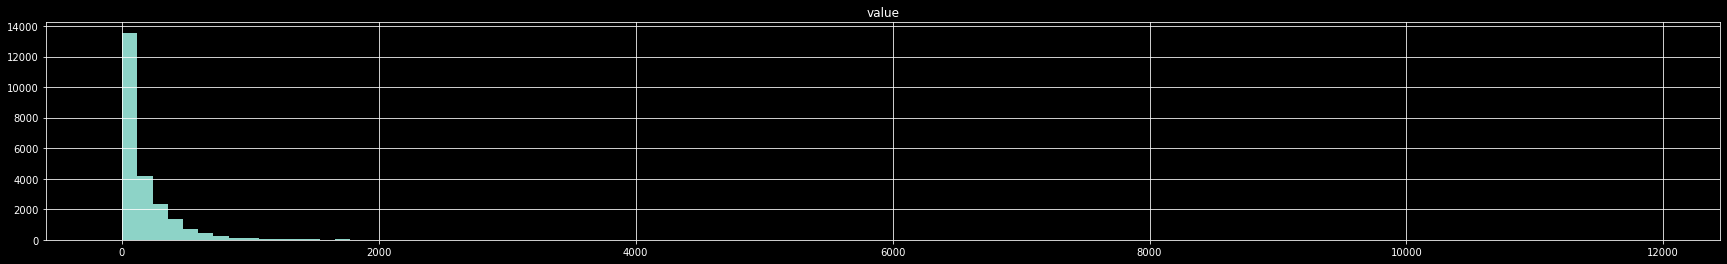

In [ ]:
hist=items.hist(column="value",bins=100,figsize=(30, 4))

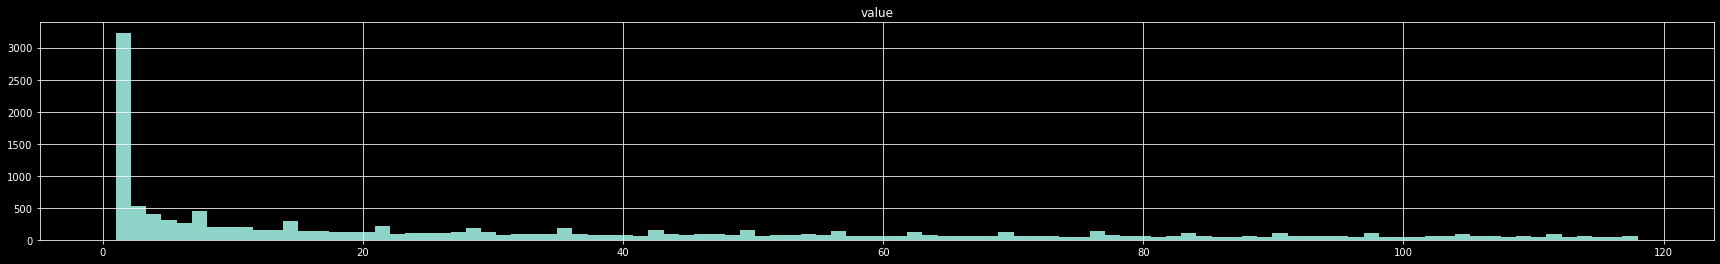

In [ ]:
hist=items[10000:].hist(column="value",bins=100,figsize=(30, 4))

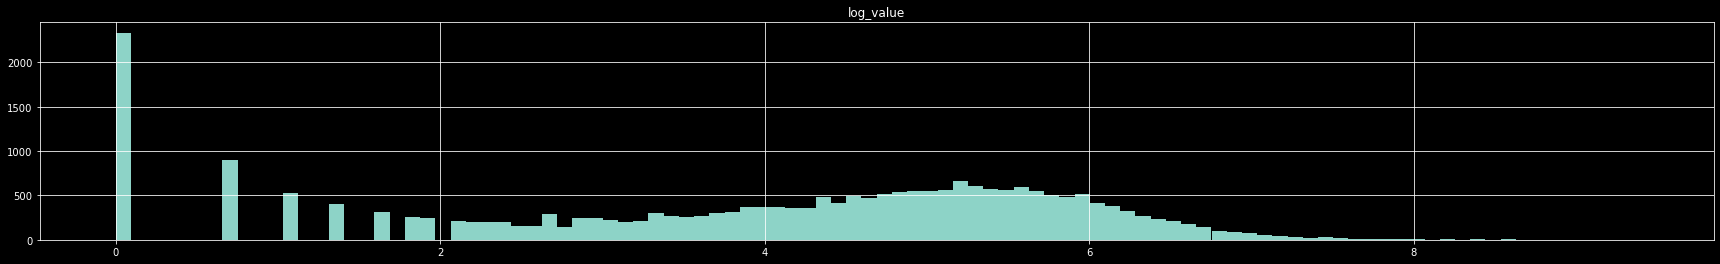

In [ ]:
hist=items.hist(column="log_value",bins=100,figsize=(30, 4))

## TopPop Analisis

In [ ]:
top_pop_general=items["item_id"][:100].values.tolist()

In [ ]:
for item in top_pop_general:
    print(str(item)+",",end=" ")
print()


1468, 4741, 6135, 323, 3526, 3037, 9262, 1449, 3229, 2115, 5960, 16491, 6925, 1659, 3676, 3833, 1393, 3531, 4714, 1227, 3060, 3746, 4878, 786, 4411, 3306, 200, 4810, 2180, 3586, 540, 1609, 554, 4870, 190, 2734, 2466, 2549, 4796, 4935, 3844, 11075, 2954, 917, 1869, 3886, 3400, 772, 6006, 2674, 4026, 6345, 4158, 8828, 2577, 17081, 4645, 11658, 407, 3362, 1584, 270, 4213, 4503, 15531, 3867, 11761, 2530, 3004, 7597, 14563, 10738, 3656, 18733, 6785, 4631, 4036, 2320, 2780, 10479, 7749, 1458, 3318, 2302, 4007, 5215, 3333, 9661, 2546, 2842, 2638, 14744, 2233, 3155, 13059, 2785, 421, 3550, 4691, 1148, 


In [ ]:
train_sessions["month"] =train_sessions["date"].dt.month
train_sessions["year"] =train_sessions["date"].dt.year

In [ ]:
monthly_ds=train_sessions.groupby(["month","year","item_id"])["value"].count().reset_index()

In [ ]:
monthly_ds

,month,year,item_id,value
0,1,2020,30,25
1,1,2020,34,1
2,1,2020,62,3
3,1,2020,108,6
4,1,2020,186,62
...,...,...,...,...
122535,12,2020,23591,1
122536,12,2020,23595,1
122537,12,2020,23635,5
122538,12,2020,23655,1


In [ ]:
top_pops={}
top_pops["general"]=top_pop_general

In [ ]:
for year in range(2):
    year=year+2020
    for month in range(12):
        month+=1
        if year==2021 and month>5:
            break
        
        ds=monthly_ds[monthly_ds["month"]==month]
        ds=ds[ds["year"]==year]
        ds=ds.sort_values(by="value",ascending=False)
        top_pops[f"{month}/{year}"]=ds["item_id"][:100].values.tolist()

In [ ]:
seen=[]
heatmap=np.zeros((len(top_pops.keys()),len(top_pops.keys())))
for x,i in enumerate(top_pops.keys()):
    for y,j in enumerate(top_pops.keys()):
        seen.append(i)
        if j not in seen:
            count=0
            for item in top_pops[i]:
                if item in top_pops[j]:
                    count+=1
            #print(f"items_in_common between {i} and {j}: {count}")
            heatmap[x,y]=count
            heatmap[y,x]=count

In [ ]:
top_pops.keys()

dict_keys(['general', '1/2020', '2/2020', '3/2020', '4/2020', '5/2020', '6/2020', '7/2020', '8/2020', '9/2020', '10/2020', '11/2020', '12/2020', '1/2021', '2/2021', '3/2021', '4/2021', '5/2021'])

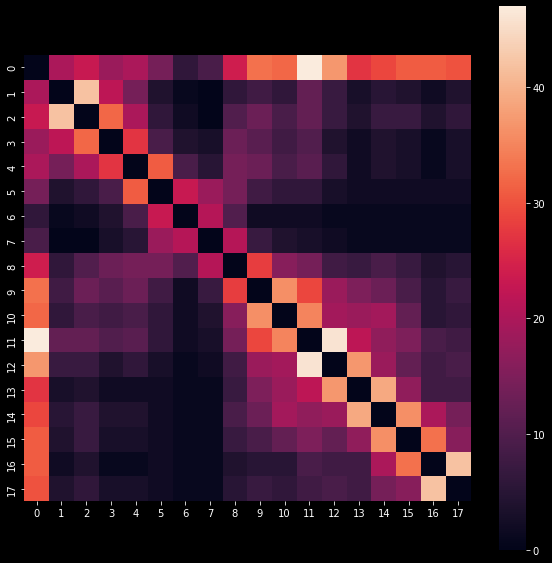

In [ ]:
#0 is overall top_popular_list
#other numbers are the index of the month starting from january 2020 up to may 2021
#We can see that general top pop is close to november 2020 -> this can be due to the fact that is the month with most sessions
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(heatmap, square=True)

## Added test set to heatmap

In [ ]:
items_test=test_sessions_no_duplicates.groupby("item_id")["value"].count().reset_index()
items_test=items_test.sort_values(by="value",ascending=False)
top_pop_test=items_test["item_id"][:100].values.tolist()

In [ ]:
heatmap_test=np.zeros((len(top_pops.keys())+1,len(top_pops.keys())+1))

In [ ]:
heatmap_test[:-1,:-1]=heatmap

In [ ]:
for x,i in enumerate(top_pops.keys()):
    count=0
    for item in top_pops[i]:
        if item in top_pop_test:
            count+=1
    heatmap_test[-1,x] = count
    heatmap_test[x,-1] = count

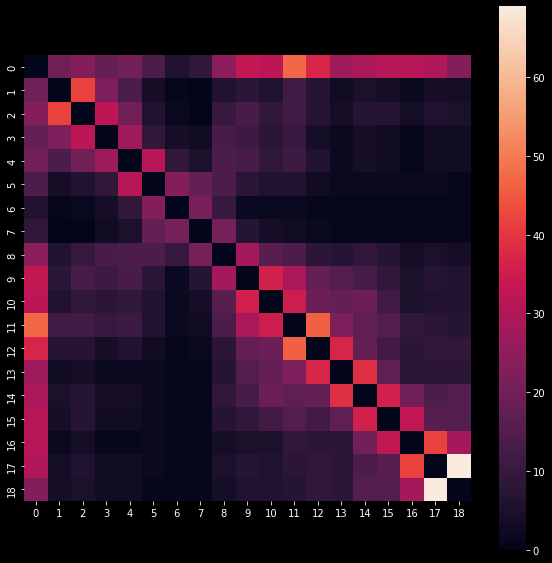

In [ ]:
#last row/column are test set interaction top_pop
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(heatmap_test, square=True)